In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [40]:
data = pd.read_csv('C:/Users/Lenovo/Desktop/Fertilizer Prediction.csv')

In [41]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


<AxesSubplot:ylabel='Fertilizer Name'>

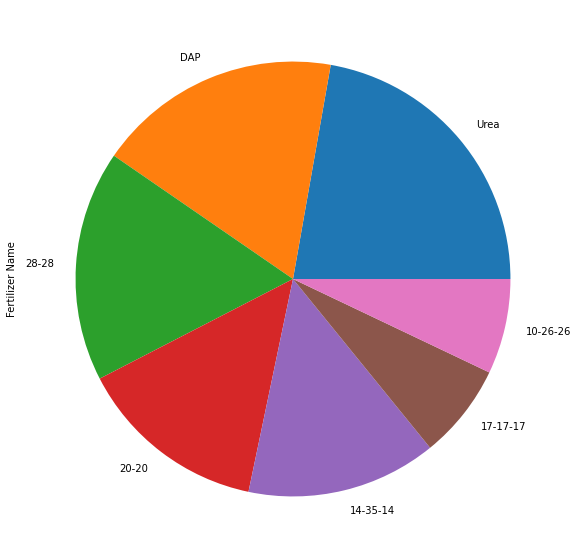

In [42]:
data ['Fertilizer Name'].value_counts().plot(kind="pie",figsize=(10,10))

In [43]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data["Soil Type"] = lab.fit_transform(data["Soil Type"])
data["Crop Type"] = lab.fit_transform(data["Crop Type"])

In [44]:
x = data.drop("Fertilizer Name",axis=1)
y = data["Fertilizer Name"]

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size = 0.2,random_state =0)

In [45]:
x.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0


In [46]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20,max_depth=5,n_jobs=-1)
print(clf)
clf.fit(Xtrain,Ytrain)

predicted_values = clf.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

print(x)

print(classification_report(Ytest,predicted_values))

RandomForestClassifier(max_depth=5, n_estimators=20, n_jobs=-1)
0.95
              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.93      0.95      0.92        20
weighted avg       0.97      0.95      0.95        20



In [47]:
import pickle
pickle.dump(clf, open('C:/Users/Lenovo/Desktop/fremodel.pkl','wb'))

In [48]:
model = pickle.load(open('C:/Users/Lenovo/Desktop/fremodel.pkl','rb'))
print(model.predict([[26,52,38,4,3,37,0,0]]))

['Urea']
